# PyJEM.detector(検出器指定)


## 概要
detectorパッケージは、検出器の情報の変更、IN/OUT、Auto機能の実行などを行うことができます。  
検出器情報は検出器ごとに持つため、detector.Detector( *arg* )の引数で検出器を指定し情報の変更、Auto機能の実行を行うことができます。

## detectorパッケージの読み込み

In [2]:
from PyJEM.offline import detector

In [3]:
help(detector)

Help on package PyJEM.offline.detector in PyJEM.offline:

NAME
    PyJEM.offline.detector - offline detector package

PACKAGE CONTENTS
    function

DATA
    detectors = ['camera', 'STEM Image']
    extention_list = ['jpg', 'tif', 'bmp', 'png']
    i = 1
    ref_imagefilename = r'\snapshot.'
    resource_path = r'C:\Anaconda3\lib\site-packages\PyJEM\offline\resourc...
    word = 'STEM Image'

FILE
    c:\anaconda3\lib\site-packages\pyjem\offline\detector\__init__.py




## PyJEMで制御可能な検出器名一覧の取得
このコマンド実行時に利用できる検出器一覧をList型で取得します。
このコマンドは、PyJEM.detectorをimport時に実行しています。

In [4]:
detector.get_attached_detector()

['camera', 'STEM Image']

## 検出器の挿入
引数で指定した検出器を挿入します。  
挿入できる検出器は、import detectorで表示される検出器です。

In [4]:
detect = "camera"
detector.assign_channel(detect, 1)

{'camera': '1'}

## 検出器の指定
detectorパッケージを読み込むと、detectorsという変数に利用できる検出器一覧Listが入る。  
初回パッケージ読み込み時に利用できる検出器一覧は表示される。    
　*取得できる検出器名はご利用の装置によって異なります。

In [15]:
detect = "camera"
for i in detector.detectors:
    if(detect in i):
        cam = detector.Detector(i)
        break

camera is Correct!


In [7]:
detector.detectors

['camera', 'STEM Image']

In [9]:
cam = detector.Detector(0)

camera is Correct!


## Live状態の変更

### Live状態の停止
指定した検出器のLive状態を停止にします。  
Live状態の変更に成功すると戻り値が{"status":"OK"}  
Live状態の変更に失敗すると戻り値が{"status":"Failed"}

In [10]:
cam.livestop()

{'OK', 'status'}

### Live状態の開始
指定した検出器のLive状態を開始にします。  
Live状態の変更に成功すると戻り値が{"status":"OK"}  
Live状態の変更に失敗すると戻り値が{"status":"Failed"}

In [11]:
cam.livestart()

{'OK', 'status'}

## 像の撮影・取得
選択した検出器で像の撮影・保存を行う。保存できる拡張子は、jpg, tif, bmp  
撮影の可否は存在し、TEMCenterのUIから画像撮影できない場合はPyJEMからも撮影が出来ない。  
検出器が入っていることが前提条件となる。

### Snapshot (拡張子のみの入力)
像の撮影を行い、引数で指定した拡張子の画像ファイルをbyte列として返す。  

In [12]:
ext = "tif" # tif, jpg, bmp

data = cam.snapshot(ext)
print("Size: {0}" .format(data.__sizeof__()))
print("Type: {0}" .format(type(data)))

TypeError: Can't convert 'int' object to str implicitly

In [13]:
help(cam.snapshot)

Help on method snapshot in module PyJEM.offline.detector.function:

snapshot(extention, save=False, filename=None, show=False) method of PyJEM.offline.detector.function.Detector instance
    | [Offline] 
    | **Summary**
    | Take an image with the specified extension.
      The captured image is returned as a file stream.
    | Select whether to save the image file with flag.
    | **arg**
    |  extention: "jpg", "png", "bmp", "tiff"
    |  flag: True: save image file.
    |  filename: Name of file to save
    |  show: show the saved file.
    | **return**
    | type   : Stream
    | File stream saved with the selected extension



### Snapshot (撮影した像の表示)
像の撮影で取得した画像を表示する。（IronPython上でのみ表示可能)  
実行の戻り値は、保存された画像のファイルパス

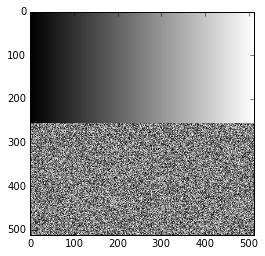

In [16]:
%matplotlib inline
ext = "tif" # tif, jpg, bmp
cam.snapshot(ext,show = True)

### Snapshot (画像ファイルの保存)
引数のsaveをTrueにすると、ファイル名がSnapShot実行時の日時の画像ファイルとして保存する。  
PyJEMインストール時にデスクトップに作成される...\PyJEM\imageが画像保存されるフォルダへのショートカット

In [9]:
ext = "tif" # tif, jpg, bmp

cam.snapshot(ext, save=True)

array([[  0,   0,   1, ..., 254, 255, 255],
       [  0,   0,   1, ..., 254, 255, 255],
       [  0,   0,   1, ..., 254, 255, 255],
       ..., 
       [ 40, 117, 162, ...,   2,  78,  86],
       [124,  64,  52, ..., 249, 242, 237],
       [114, 207, 175, ...,  19,   4, 117]], dtype=uint8)

### Snapshot (画像ファイル名を指定して保存)
引数のfilenameにファイル名を入力することで、任意のファイル名で保存することができる。  
filenameには、拡張子無しで入力  
ファイル名以外(C:\..\..\filenameといったパスあり)では、保存することができない

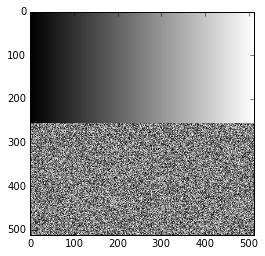

In [17]:
ext = "tif" # tif, jpg, bmp

cam.snapshot(ext, show=True, save=True, filename="test")

### LiveSnapshot 
Live状態を止めずに画像の撮影/取得  
引数で指定できるのは拡張子のみで、取得できるデータは指定した拡張子で保存された画像ファイルのbyte列

In [60]:
ext = "tif" # tif, jpg, bmp

data = cam.livesnapshot(ext)
print("data size: {0}" .format(data.__sizeof__()))
print("data type: {0}" .format(type(data)))

data size: 182715
data type: <class 'bytes'>


### 生画像の取得
指定した検出器で撮影した生の画像データを取得することができる。  
上記で説明した画像の取得では、スケールバーや検出器情報が画像データの中に含まれるが、  
以下の関数で取得した画像データには含まれない。

In [61]:
data = cam.snapshot_rawdata()
print("data size: {0}" .format(data.__sizeof__()))
print("data type: {0}" .format(type(data)))

data size: 1048609
data type: <class 'bytes'>


## 検出器情報の取得
Json Dict型で検出器情報を取得する

In [18]:
data = cam.get_detectorsetting()
rdata = sorted(data.items(), key=lambda x: x[0])
for k,v in rdata:
    print("{0}: {1}" .format(k,v))

AreaModeImagingArea: {'Width': 256, 'Left': 128, 'Height': 256, 'Top': 128}
AreaModeImagingAreaMaximum: 2048, 2048
AreaModeImagingAreaMinimum: 4, 2
CanBinning: False
CanGain: True
CanOffset: True
ExposureTime: []
ExposureTimeIndex: 0
ExposureTimeIndexMaximum: 4094
ExposureTimeIndexMinimum: 0
ExposureTimeString: 0.17
ExposureTimeValue: 0.16666666666666666
FrameRate: []
GainIndex: 0
GainIndexMaximum: 4095
GainIndexMinimum: 0
HorizontalLineNo: 1
ImagingArea: {'Width': 512, 'X': 0, 'Height': 512, 'Y': 0}
ImagingAreaMaximum: 1280, 1024
ImagingAreaMinimum: 4, 2
OffsetIndex: 0
OffsetIndexMaximum: 4095
OffsetIndexMinimum: 0
OutputImageInformation: {'EffectBits': 16, 'PixelsPerMeter': {'Vertical': 3401, 'Horizontal': 3401}, 'DataBits': 16, 'ImageSize': {'Width': 512, 'Height': 512}}
ScanRotation: 0.0
SpotPosition: {'X': 0, 'Y': 0}
SyncMode: 1
Version: 1.00
frameIntegration: 20
frameIntegrationMaximum: 255
frameIntegrationMinimum: 1
horizontalLineNoMaximum: 512
horizontalLineNoMinimum: 1
scanMod

## 検出器情報の設定
指定した検出器情報の変更をします。  
検出器によって変更できないものがあります。

### ExposureTime (Value)

In [63]:
value = 1000
print("Before value: {0}" .format(cam.get_detectorsetting()["ExposureTimeValue"]))
after=cam.set_exposuretime_value(value)
print("After value: {0}" .format(after["ExposureTimeValue"]))

Before value: 1000
After value: 1000


In [19]:
help(cam.set_exposuretime_value)


Help on method set_exposuretime_value in module PyJEM.offline.detector.function:

set_exposuretime_value(value) method of PyJEM.offline.detector.function.Detector instance
    | [Offline] 
    | **Summary**
    | Set the exposure time as usec value.
    | **arg**
    | value - 0-1000000[μsec] (It depends on TEM model)
    | **return**
    | The value set to TEM.
    | type   : json.Dict



### Gain (Contrast)

In [64]:
value = 19535
print("Before value: {0}" .format(cam.get_detectorsetting()["GainIndex"]))
after=cam.set_gainindex(value)
print("After value: {0}" .format(after["GainIndex"]))

Before value: 0
After value: 19535


### Offset (Brightness)

In [65]:
value = 32128
print("Before value: {0}" .format(cam.get_detectorsetting()["OffsetIndex"]))
after=cam.set_offsetindex(value)
print("After value: {0}" .format(after["OffsetIndex"]))

Before value: 32128
After value: 32128


## Scan検出器のみ

### ScanRotation
Scan角度変更を行います。  
360以上の値が入力された場合は、0-359の値に丸め込まれます。

In [66]:
value = 0
print("Before value: {0}" .format(cam.get_detectorsetting()["ScanRotation"]))
after=cam.set_scanrotation(value)
print("After value: {0}" .format(after["ScanRotation"]))

Before value: 0
After value: 0


### Scanモードの変更
以下の値を入れると対応したScanモードに切り替わる  
* 0: Search (Full Scan)  
* 1: Area Scan
* 3: Spot 

### Full Scanモード

In [67]:
value = 0 
print("Before value: {0}" .format(cam.get_detectorsetting()["scanMode"]))
after=cam.set_scanmode(value)
print("After value: {0}" .format(after["scanMode"]))

Before value: 0
After value: 0


### Imagingarea 
検出器が取得する画像サイズの変更をします。  
Heightが高さ、Widthが幅  
 *指定できる値の最大最小値は、get_detectorsetting()で取得することができます。

In [68]:
w = 512
h = 512
print("Before value: {0}" .format(cam.get_detectorsetting()["ImagingArea"]))
after=cam.set_imaging_area(w, h)
print("After value: {0}" .format(after["ImagingArea"]))

Before value: {'X': 0, 'Y': 0, 'Width': 512, 'Height': 512}
After value: {'X': None, 'Y': None, 'Width': 512, 'Height': 512}


### Spot  Mode

In [69]:
value = 3 
print("Before value: {0}" .format(cam.get_detectorsetting()["scanMode"]))
after=cam.set_scanmode(value)
print("After value: {0}" .format(after["scanMode"]))

Before value: 0
After value: 3


### SpotPosition
SpotLine座標の変更を行います。  

In [70]:
x = 512
y = 512
print("Before value: {0}" .format(cam.get_detectorsetting()["SpotPosition"]))
after=cam.set_spotposition(x, y)
print("After value: {0}" .format(after["SpotPosition"]))

Before value: {'X': 0, 'Y': 0}
After value: {'X': 512, 'Y': 512}


## AutoFocus

TEMCenterに実装されているAutoFocus機能を実行する。  
実行するための前提条件に
* ビームバルブが開いている
* 検出器が挿入されている  等

実行すると、AutoFocusの処理が終了するまで待つ

In [20]:
cam.AutoFocus()

{'OK', 'status'}

## AutoContrastBrightness

TEMCenterに実装されているAutoContrastBrightness機能を実行する。  
実行するための前提条件に
* ビームバルブが開いている
* 検出器が挿入されている  等

実行すると、AutoContrastBrightnessの処理が終了するまで待つ

In [72]:
cam.AutoContrastBrightness()

{'OK', 'status'}

## AutoStigmators

TEMCenterに実装されているAutoStigmators機能を実行する。  
実行するための前提条件に
* ビームバルブが開いている
* 検出器が挿入されている  等

実行すると、AutoStigmatorsの処理が終了するまで待つ

In [73]:
cam.AutoStigmator()

{'OK', 'status'}

## AutoZ

TEMCenterに実装されているAutoZ機能を実行する。  
実行するための前提条件に
* ビームバルブが開いている
* 検出器が挿入されている  等

実行すると、AutoZの処理が終了するまで待つ

In [74]:
cam.AutoZ()

{'OK', 'status'}

## AutoOrientation

TEMCenterに実装されているAutoOrientation機能を実行する。  
実行するための前提条件に
* ビームバルブが開いている
* 検出器が挿入されている  等

実行すると、AutoOrientationの処理が終了するまで待つ

In [75]:
cam.AutoOrientation()

{'OK', 'status'}